In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
'''
# Load the data
data = pd.read_csv('kaggle_bot_accounts.csv')

# Drop all NaN values
data.dropna(inplace=True)

# Recode Gender to 1 for male and 0 for Female
data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='Male' else 0)
# Recode the String columns to 1 for present and -1 for null
# data['NAME'] = data['NAME'].apply(lambda x: -1 if pd.isna(x) else 1)
# data['EMAIL_ID'] = data['EMAIL_ID'].apply(lambda x: -1 if pd.isna(x) else 1)

# Recode the boolean columns to integer
data['IS_GLOGIN'] = data['IS_GLOGIN'].astype(int)
data['ISBOT'] = data['ISBOT'].astype(int)

# Dropping registration location & registration IP address & 'Unamed: 0' column
data.drop(['REGISTRATION_LOCATION', 'REGISTRATION_IPV4', 'Unnamed: 0', 'EMAIL_ID', 'NAME'], axis=1, inplace=True)

# count how many NaN values there are in ISBOT
# print(data['ISBOT'].isnull().sum())
# 78500
# count how many non NaN values there are in ISBOT
# print(data['ISBOT'].notnull().sum())
# 1242688

# Drop all rows with NaN values in ISBOT
data.dropna(subset=['ISBOT'], inplace=True)
'''

"\n# Load the data\ndata = pd.read_csv('kaggle_bot_accounts.csv')\n\n# Drop all NaN values\ndata.dropna(inplace=True)\n\n# Recode Gender to 1 for male and 0 for Female\ndata['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='Male' else 0)\n# Recode the String columns to 1 for present and -1 for null\n# data['NAME'] = data['NAME'].apply(lambda x: -1 if pd.isna(x) else 1)\n# data['EMAIL_ID'] = data['EMAIL_ID'].apply(lambda x: -1 if pd.isna(x) else 1)\n\n# Recode the boolean columns to integer\ndata['IS_GLOGIN'] = data['IS_GLOGIN'].astype(int)\ndata['ISBOT'] = data['ISBOT'].astype(int)\n\n# Dropping registration location & registration IP address & 'Unamed: 0' column\ndata.drop(['REGISTRATION_LOCATION', 'REGISTRATION_IPV4', 'Unnamed: 0', 'EMAIL_ID', 'NAME'], axis=1, inplace=True)\n\n# count how many NaN values there are in ISBOT\n# print(data['ISBOT'].isnull().sum())\n# 78500\n# count how many non NaN values there are in ISBOT\n# print(data['ISBOT'].notnull().sum())\n# 1242688\n\n# Drop 

In [2]:
import json
#json to pd
bots = json.loads(open('botwiki-2019_tweets.json').read())
verified = json.loads(open('verified-2019_tweets.json').read())

real = []
fake = []

for user in verified:
    real.append(user['user'])
for user in bots:
    fake.append(user['user'])

realdf = pd.DataFrame(real)
fakedf = pd.DataFrame(fake)
# add a column to each dataframe to indicate if the user is a bot or not
realdf['ISBOT'] = 0
fakedf['ISBOT'] = 1

# concatenate the two dataframes
data = pd.concat([realdf, fakedf], ignore_index=True)
print(len(data.columns))
data = data.loc[:, ['protected', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'verified', 'geo_enabled', 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_tile', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'ISBOT']]
print(data.dtypes)
# Convert all boolean columns to integer
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype('float32')

43
protected                        bool
followers_count                 int64
friends_count                   int64
listed_count                    int64
favourites_count                int64
verified                         bool
geo_enabled                      bool
statuses_count                  int64
contributors_enabled             bool
is_translator                    bool
is_translation_enabled           bool
profile_background_tile          bool
profile_use_background_image     bool
has_extended_profile             bool
default_profile                  bool
default_profile_image            bool
following                        bool
follow_request_sent              bool
notifications                    bool
ISBOT                           int64
dtype: object


[1987, 698]


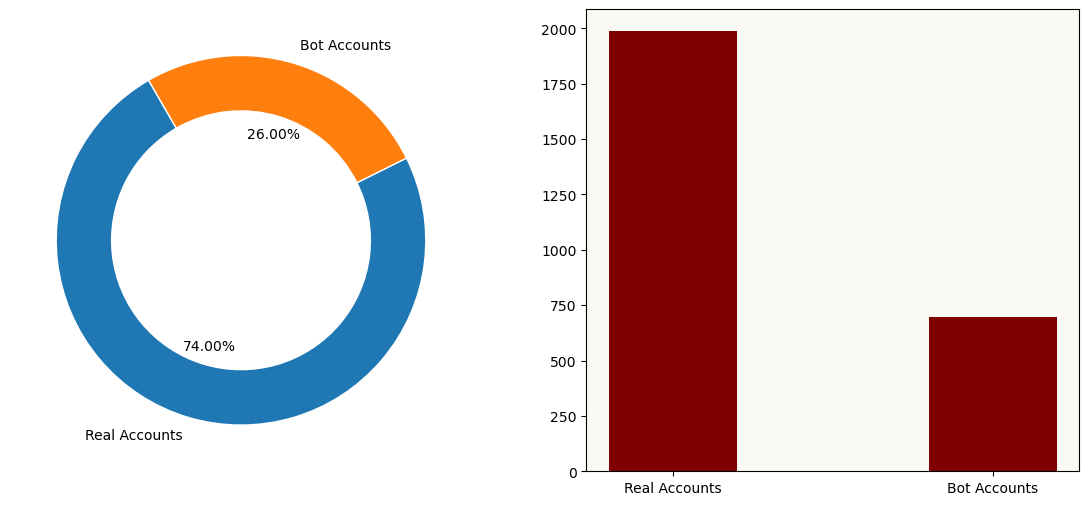

In [3]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
Items = ['Real Accounts', 'Bot Accounts']
values = [len(realdf), len(fakedf)]
print(values)
ax1.pie(values,wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=Items, radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(Items, list(values),
              color ='maroon',width = 0.4)

plt.show()

In [4]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
Y = data['ISBOT']
X = data.drop(['ISBOT'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# One hot encoding for Y values (i.e 0 or 1 to [1,0] or [0,1])
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [5]:
# Create a 3 layer neural network with 10 nodes in each layer

input_size = X_train.shape[1]
output_size = Y_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                480       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 872
Trainable params: 872
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
68/68 [==============================] - 2s 6ms/step - loss: 278.0861 - accuracy: 0.7737
Epoch 2/10
68/68 [==============================] - 0s 6ms/step - loss: 68.4154 - accuracy: 0.8776
Epoch 3/10
68/68 [==============================] - 0s 7ms/step - loss: 46.1597 - accuracy: 0.8864
Epoch 4/10
68/68 [==============================] - 0s 7ms/step - loss: 32.3292 - accuracy: 0.8906
Epoch 5/10
68/68 [==============================] - 0s 6ms/step - loss: 23.8044 - accuracy: 0.9022
Epoch 6/10
68/68 [==============================] - 0s 7ms/step - loss: 31.7402 - accuracy: 0.9092
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 25.4510 - accuracy: 0.9097
Epoch 8/10
68/68 [==============================] - 0s 7ms/step - loss: 22.7352 - accuracy: 0.9046
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 18.0294 - accuracy: 0.9139
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 46.2831 - accuracy: 0.9274


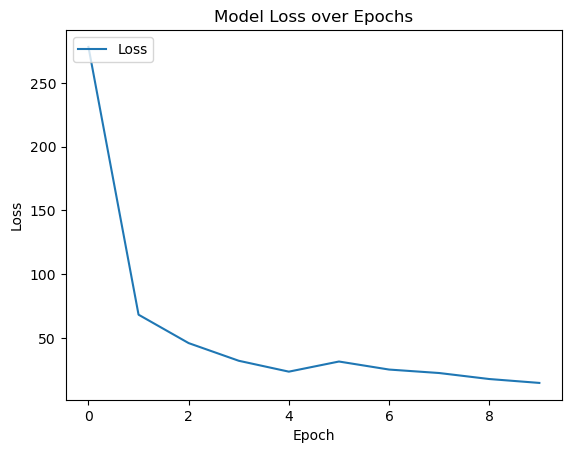

In [6]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32, verbose=1)
model.evaluate(X_test, Y_test)

plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

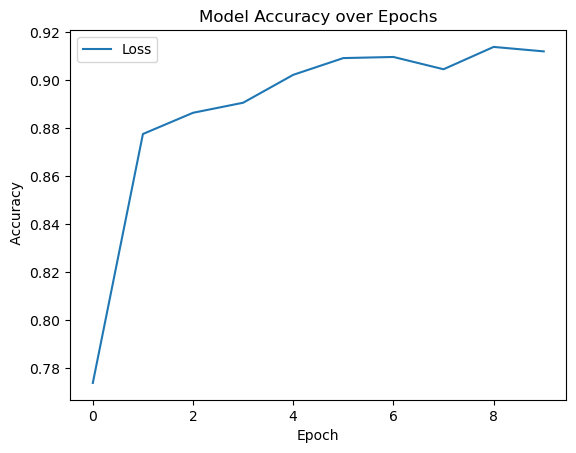

In [7]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel(' Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

In [11]:
# Knowledge Distillation!

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses with predetermined loss function
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            # Distillation is performed with predetermined distillation function
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [72]:
student = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])

student_clone = tf.keras.models.clone_model(student)
student.summary()

student_clone.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
student_clone.summary()

distiller = Distiller(student=student, teacher=model)
distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.BinaryCrossentropy(), 'accuracy'],
    student_loss_fn=keras.losses.BinaryCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 12)                240       
                                                                 
 dense_50 (Dense)            (None, 6)                 78        
                                                                 
 dense_51 (Dense)            (None, 2)                 14        
                                                                 
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 12)                240       
                                                                 
 dense_50 (Dense)            (No

In [73]:
# Distill teacher to student
student_history = distiller.fit(X_train, Y_train, epochs=5, batch_size = 32, verbose=1)

# Evaluate student on test dataset
distiller.evaluate(X_test, Y_test)

Epoch 1/5
68/68 [==============================] - 2s 9ms/step - binary_crossentropy: 842.3539 - accuracy: 0.7295 - student_loss: 822.0143 - distillation_loss: 0.1003
Epoch 2/5
68/68 [==============================] - 1s 8ms/step - binary_crossentropy: 500.1516 - accuracy: 0.7295 - student_loss: 489.7808 - distillation_loss: 0.0395
Epoch 3/5
68/68 [==============================] - 1s 9ms/step - binary_crossentropy: 236.2443 - accuracy: 0.7300 - student_loss: 238.6520 - distillation_loss: 0.0610
Epoch 4/5
68/68 [==============================] - 1s 9ms/step - binary_crossentropy: 75.9769 - accuracy: 0.7467 - student_loss: 73.9740 - distillation_loss: 0.0440
Epoch 5/5
17/17 [==============================] - 0s 6ms/step - binary_crossentropy: 113.4972 - accuracy: 0.9292 - student_loss: 106.9589


[113.49716186523438, 0.9292364716529846, 16.931861877441406]

In [74]:
student_clone_history = student_clone.fit(X_train, Y_train, epochs=5, batch_size = 32, verbose=1)

# Evaluate student on test dataset
student_clone.evaluate(X_test, Y_test)

Epoch 1/5
68/68 [==============================] - 1s 7ms/step - loss: 965.3666 - accuracy: 0.7267
Epoch 2/5
68/68 [==============================] - 0s 5ms/step - loss: 609.3757 - accuracy: 0.7267
Epoch 3/5
68/68 [==============================] - 0s 6ms/step - loss: 325.9691 - accuracy: 0.7281
Epoch 4/5
68/68 [==============================] - 0s 5ms/step - loss: 80.9345 - accuracy: 0.7956
Epoch 5/5
17/17 [==============================] - 0s 4ms/step - loss: 13.8272 - accuracy: 0.9218


[13.827159881591797, 0.9217877388000488]

{'binary_crossentropy': [842.3538818359375, 500.15155029296875, 236.24429321289062, 75.9769058227539, 16.972286224365234], 'accuracy': [0.7295158505439758, 0.7295158505439758, 0.7299813628196716, 0.7467411756515503, 0.9138733744621277], 'student_loss': [93.85579681396484, 118.50505065917969, 324.8465576171875, 2.2712624073028564, 0.0], 'distillation_loss': [0.12385492771863937, 0.031244615092873573, 0.03121020272374153, 1.3723911251872778e-05, 0.0]}


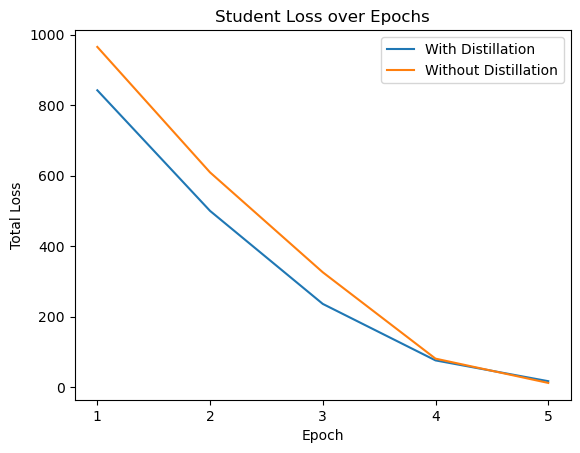

In [77]:
# Graph the loss difference between the student and it's clone
print(student_history.history)
plt.plot(student_history.history['binary_crossentropy'])
plt.plot(student_clone_history.history['loss'])
plt.title('Student Loss over Epochs')
plt.ylabel('Total Loss')
plt.xlabel('Epoch')
plt.legend(['With Distillation', 'Without Distillation'])
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
plt.show()

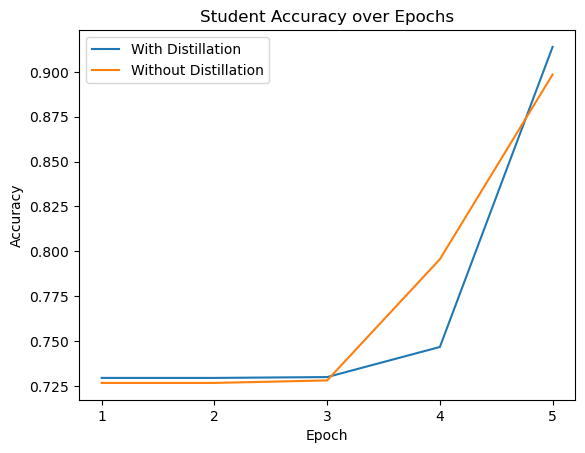

In [78]:
# Accuracy of the student vs clone
plt.plot(student_history.history['accuracy'])
plt.plot(student_clone_history.history['accuracy'])
plt.title('Student Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['With Distillation', 'Without Distillation'])
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
plt.show()

In [ ]:
# save model
model.save('model.h5')